# Geopandas Intro

**Inhalt:** Erste Schritte mit Geopandas

**Nötige Skills**
- Basic pandas skills
- Funktionen und pandas

**Lernziele**
- Shapes kennenlernen
- Punkte und Linien erstellen
- Geodataframes erstellen
- Geometrien definieren
- Plotten in Geopandas

## Das Beispiel

Bergbahnen in der Schweiz. Wir laden die geografischen Informationen sämtlicher Bergbahnen und stellen sie auf einer Karte dar.

## Setup

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd
from shapely.geometry import Point, LineString

In [3]:
%matplotlib inline

## Import

**Ein Shapefile für die Schweizer Kantone**

Dieses File brauchen wir erst ganz am Schluss.

In [4]:
gdf_kantone = gpd.read_file('dataprojects/Projections/shp/g1k17.shp')

In [5]:
gdf_kantone.head(2)

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Zürich,4,172894,669244,716900,223896,283343,691800,252000,...,1291,533,504,2669244,2716900,1223896,1283343,2691800,1252000,"POLYGON ((692429.2019999996 281173.7069999985,..."
1,2,Bern / Berne,2,595952,556241,677745,130585,243834,614200,185600,...,4271,1198,979,2556241,2677745,1130585,1243834,2614200,1185600,(POLYGON ((573502.2039999999 194804.7199999988...


**Eine Liste der Bergbahnen**

Mit dieser Liste werden wir hauptsächlich arbeiten.

In [6]:
df_bergbahnen = pd.read_excel('dataprojects/Projections/data/bergbahnen3D.xlsx')

In [7]:
df_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902


In [8]:
df_bergbahnen['OBJEKTART'].value_counts()

Skilift         841
Sesselbahn      365
Luftseilbahn    327
Gondelbahn      124
Name: OBJEKTART, dtype: int64

## Geometrien in Geopandas

In unserem Shapefile der Kantone (\*.shp) ist bereits eine Geometrie definiert: Eine separate Spalte in jedem Kanton ist dafür reserviert.

In [9]:
gdf_kantone.columns

Index(['KTNR', 'KTNAME', 'GRNR', 'AREA_HA', 'X_MIN', 'X_MAX', 'Y_MIN', 'Y_MAX',
       'X_CNTR', 'Y_CNTR', 'Z_MIN', 'Z_MAX', 'Z_AVG', 'Z_MED', 'E_MIN',
       'E_MAX', 'N_MIN', 'N_MAX', 'E_CNTR', 'N_CNTR', 'geometry'],
      dtype='object')

In der Geometrie-Spalte sind (Überraschung!) geometrische Informationen drin. In diesem Fall: ein Polygon.

In [10]:
gdf_kantone.geometry

0     POLYGON ((692429.2019999996 281173.7069999985,...
1     (POLYGON ((573502.2039999999 194804.7199999988...
2     POLYGON ((662037.5579999983 237690.7230000012,...
3     POLYGON ((688456.9990000017 203340, 688740 200...
4     POLYGON ((705202.6779999994 229721.1110000014,...
5     (POLYGON ((671653.3999999985 190588.0009999983...
6     POLYGON ((671798.2509999983 206022.8359999992,...
7     POLYGON ((723477.3999999985 221272.4100000001,...
8     POLYGON ((674191.8999999985 231111.9990000017,...
9     (POLYGON ((549140.9800000004 178013.7609999999...
10    (POLYGON ((619250.5020000003 223755.1240000017...
11    POLYGON ((619154.8669999987 272278.5749999993,...
12    (POLYGON ((595269.6999999993 251478.4990000017...
13    (POLYGON ((686912.7930000015 272390.0670000017...
14    POLYGON ((758852.5929999985 259182.8200000003,...
15    (POLYGON ((746530.2170000002 250212.5769999996...
16    POLYGON ((759598.5700000003 267841.9310000017,...
17    POLYGON ((760618.8740000017 213990.9479999

Daher können wir die 26 Schweizer Kantone auch ganz einfach plotten. Und zwar mit`plot()`:

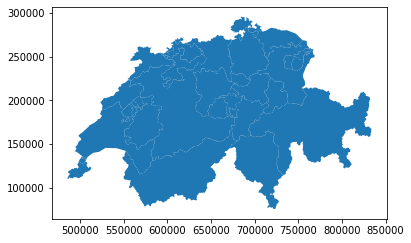

In [11]:
gdf_kantone.plot()

Unsere Bergbahnen-Liste hat allerdings noch keine Geometrie-Spalte:

In [12]:
df_bergbahnen.columns

Index(['OBJEKTART', 'NAME', 'MIN_E', 'MIN_N', 'MIN_Z', 'MAX_E', 'MAX_N',
       'MAX_Z'],
      dtype='object')

Daher kommt mit dem `plot()`-Befehl auch noch nichts sinnvolles raus:

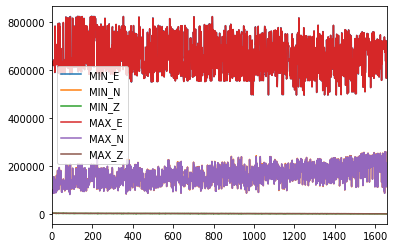

In [13]:
df_bergbahnen.plot()

Bevor wir irgendwas plotten können, müssen wir erst eine Geometrie erstellen!

**Dazu müssen wir einige Dinge klären:**
- Welche Art von Geometrie wollen wir kreieren?
- Gibt es mehrere Möglichkeiten?
- Welches sind die nötigen Informationen dafür?

### Geometrie erstellen

**Zur Erinnerung: Points()-Funktion**

Diese Funktion brauchen wir, um eine Punkt-Geometrie zu erstellen.

So erstellen Sie einen Punkt am Ort (5, -7)

In [15]:
x = 5
y = -7

In [16]:
punkt = Point(x, y)

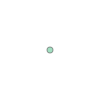

In [17]:
punkt

**In Pandas arbeiten mit apply()**

Unser Ziel ist: eine Spalte in unserem Dataframe zu haben, die für jede Bergbahn eine Punkt-Geometrie enthält.

Mit anderen Worten: Wir müssen die x- und y-Koordinaten für jeden Eintrag aus der Tabelle auslesen und mit `Point()` zu einer Punkt-Geometrie machen.

In Pandas funktioniert das folgendermassen:

In [18]:
df_bergbahnen['Punkt1'] = df_bergbahnen.apply(lambda row: Point(row['MIN_E'], row['MIN_N']), axis=1)

In [19]:
df_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797)


Zum technischen Verständnis:
- Wir haben mit dem `lambda`-Keyword eine Funktion definiert, welche die `Points()`-Funktion aufruft
- Dann haben wir diese (namenlose) Funktion mit `apply()` für jede Zeile in der Tabelle angewandt

Das Ergebnis ist: Wir haben jetzt eine Geometrie erstellt

Jetzt müssen wir Geopandas noch mitteilen, dass wir diese Geometrie verwenden wollen!

### Geometrie anwenden in Geopandas

Mit anderen Worten: Wir müssen aus dem Dataframe erst ein Geodataframe erstellen!

**Geodataframe konstruieren**

Die Konstruktor-Funktion heisst `GeoDataFrame()`. Zwei Infos sind nötig:
- Aus welchem Dataframe soll ein Geodataframe werden
- Welche Spalte soll die Geometrie definieren

In [20]:
gdf_bergbahnen = gpd.GeoDataFrame(df_bergbahnen, geometry='Punkt1')

In [21]:
gdf_bergbahnen.head(2)

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797)


Jetzt können wir plotten:

In [22]:
gdf_bergbahnen.geometry

0        POINT (621759 85777)
1        POINT (622730 86797)
2        POINT (621991 91079)
3        POINT (621542 87239)
4        POINT (621517 87222)
                ...          
1652    POINT (697094 115996)
1653    POINT (722244 213641)
1654    POINT (565980 118163)
1655    POINT (566282 119385)
1656    POINT (701713 114240)
Name: Punkt1, Length: 1657, dtype: object

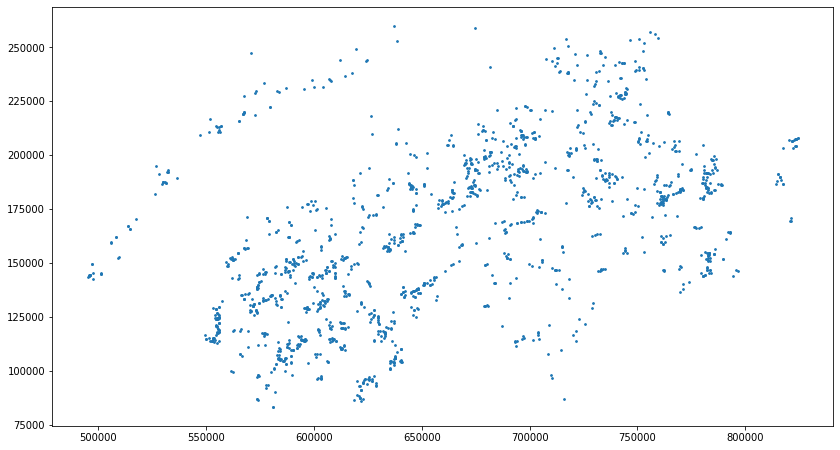

In [23]:
gdf_bergbahnen.plot(figsize=(14,10), markersize=3)

Oder zB auch nur einzele, ausgewählte Objekte:

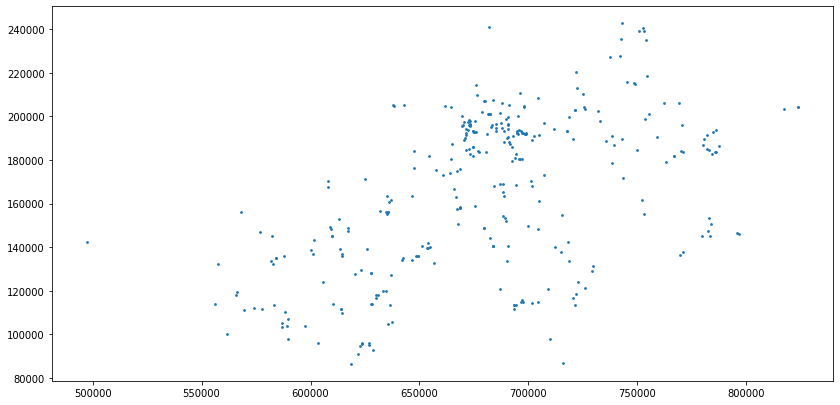

In [24]:
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3)

## Geometrien 2

Allerdings - moment mal. Unsere Seilbahnen sind eigentlich keine Punkte, sondern müssten eigentlich eine Linie sein - mit einem Anfang und einem Ende.

### Linie (again!)

**Quiz:** Erstellen Sie eine Linie durch die Punkte (8, 6) und (4, 10)

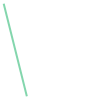

### in Pandas

**Einen zweiten Punkt erstellen**

Quiz: Erstellen Sie für jede Zeile einen Punkt2 anhand der Spalten 'MAX_E' und 'MAX_N'

Tipp: Wir wollen eine lambda-Funktion dafür verwenden

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1,Punkt2
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777),POINT (622992 85864)
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797),POINT (622992 85867)


**Eine Linie daraus machen**

Quiz: Erstellen Sie für jede Zeile eine Linie anhand der beiden Punkt-Spalten, die wir zuvor erstellt haben

,OBJEKTART,NAME,MIN_E,MIN_N,MIN_Z,MAX_E,MAX_N,MAX_Z,Punkt1,Punkt2,Linie
0,Skilift,Grenzlift,621759,85777,3713,622992,85864,3902,POINT (621759 85777),POINT (622992 85864),"LINESTRING (621759 85777, 622992 85864)"
1,Skilift,Plateau Breithorn,622730,86797,3800,622992,85867,3902,POINT (622730 86797),POINT (622992 85867),"LINESTRING (622730 86797, 622992 85867)"


**Geometrie neu setzen**

Quiz: Stellen Sie die Geometrie des GDF um auf die Linien-Spalte

**Und Plot:**

Quiz: Ein Plot von allen Luftseilbahnen

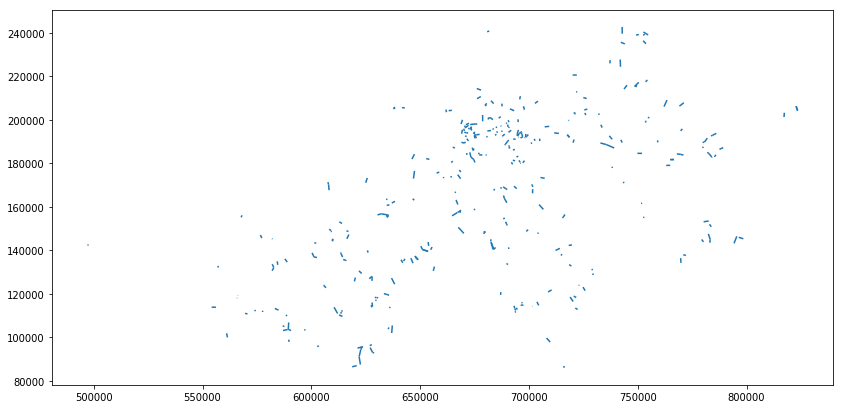

In [36]:
gdf_bergbahnen.geometry

0         LINESTRING (621759 85777, 622992 85864)
1         LINESTRING (622730 86797, 622992 85867)
2         LINESTRING (621991 91079, 622561 87549)
3         LINESTRING (621542 87239, 621973 85824)
4         LINESTRING (621517 87222, 621903 85823)
5       LINESTRING (635480 100882, 635559 100090)
6       LINESTRING (635509 100873, 635567 100091)
7         LINESTRING (621494 87233, 621656 86612)
8         LINESTRING (618779 86517, 620865 87025)
9         LINESTRING (621184 88240, 620925 86925)
10      LINESTRING (642130 155229, 642204 155320)
11        LINESTRING (628987 93322, 629781 92863)
12      LINESTRING (635482 101412, 635931 100871)
13        LINESTRING (621939 91007, 620612 88847)
14        LINESTRING (619879 88521, 620899 88189)
15      LINESTRING (589429 103726, 590692 103181)
16      LINESTRING (783301 145084, 783162 143536)
17        LINESTRING (627027 95334, 628164 93115)
18        LINESTRING (628865 92876, 628191 93082)
19        LINESTRING (628634 94280, 628852 92872)


## Mehrere Layer

Was sich immer gut macht, ist, eine Liste von Punkten auf irgendeinen geografischen Basislayer zu plotten.

An dieser Stelle verwenden wir:
- Das Geodataframe mit den Kantonen
- Das Geodagaframe mit den Bergbahnen

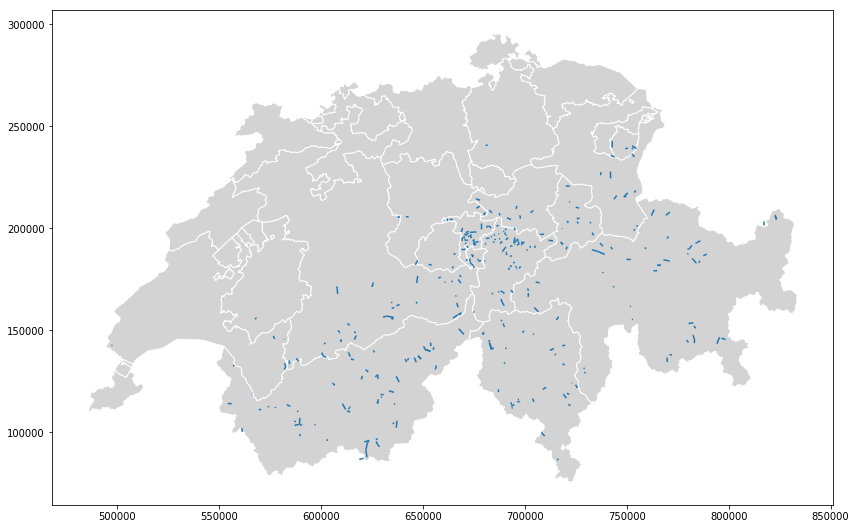

In [37]:
ax = gdf_kantone.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_bergbahnen[gdf_bergbahnen['OBJEKTART'] == 'Luftseilbahn'].plot(figsize=(14,10), markersize=3, ax=ax)